In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

In [22]:
import nltk

In [24]:
#Stroe CSV into DataFrame
rawdata_file="../resources/data-scientist-job-market-in-the-us/alldata.csv"
rawdata_df = pd.read_csv(rawdata_file)
rawdata_df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [25]:
total_no_company= rawdata_df['company'].nunique()
print('Total number of firms with data science job vacancies',total_no_company)

Total number of firms with data science job vacancies 2213


In [27]:
#finding highest number of vacancy in a company
most_vacancy = rawdata_df.groupby(['company'])['position'].count()
most_vacancy = most_vacancy.reset_index(name='position')
most_vacancy = most_vacancy.sort_values(['position'],ascending=False)
pareto_df = most_vacancy
most_vacancy=most_vacancy.head(10)
print('Top 10 firms with most vacancies',most_vacancy)

Top 10 firms with most vacancies                                      company  position
122                               Amazon.com       358
230                           Ball Aerospace       187
1270                               Microsoft       137
866                                   Google       134
1328                      NYU Langone Health        77
798   Fred Hutchinson Cancer Research Center        70
1095                                    KPMG        66
1136                                  Lab126        50
748                                 Facebook        49
324                          Broad Institute        49


Text(0, 0.5, '# OF JOBS')

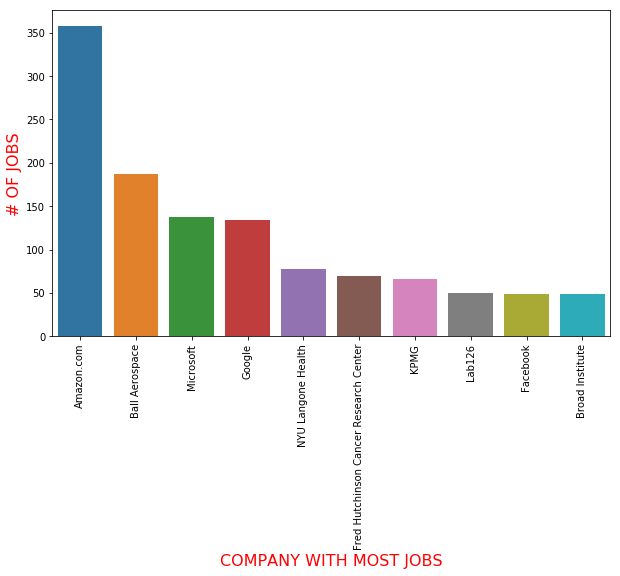

In [28]:
# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax = seaborn.barplot(x = "company", y = "position", data= most_vacancy)    
ax.set_xticklabels(most_vacancy['company'],rotation=90)  
ax.set_xlabel('COMPANY WITH MOST JOBS',fontsize=16, color='red')
ax.set_ylabel('# OF JOBS',fontsize=16,color='red') 

In [30]:
# Finding total number of unique roles in data science domain from the given dataset
total_no_roles= datasci_df['position'].nunique()
print('Toatl number of roles across all the firms',total_no_roles)

# most offered roles across all the firms
most_offd_roles=datasci_df.groupby(['position'])['company'].count()   
most_offd_roles=most_offd_roles.reset_index(name='company')
most_offd_roles=most_offd_roles.sort_values(['company'],ascending=False)
most_offd_roles=most_offd_roles.head(15)
print('Top 15 most wanted roles across firms',most_offd_roles)

Toatl number of roles across all the firms 5242
Top 15 most wanted roles across firms                        position  company
1026             Data Scientist      351
3833      Senior Data Scientist       96
3115           Research Analyst       64
928               Data Engineer       60
2152  Machine Learning Engineer       56
2071        Lead Data Scientist       31
3276         Research Scientist       30
4685         Sr. Data Scientist       28
2660   Principal Data Scientist       24
879                Data Analyst       22
4443          Software Engineer       22
2977       Quantitative Analyst       21
3486                  Scientist       17
2837            Product Manager       17
495    Bioinformatics Scientist       16


Text(0, 0.5, 'NO OF ROLES ACROSS INDUSTRY')

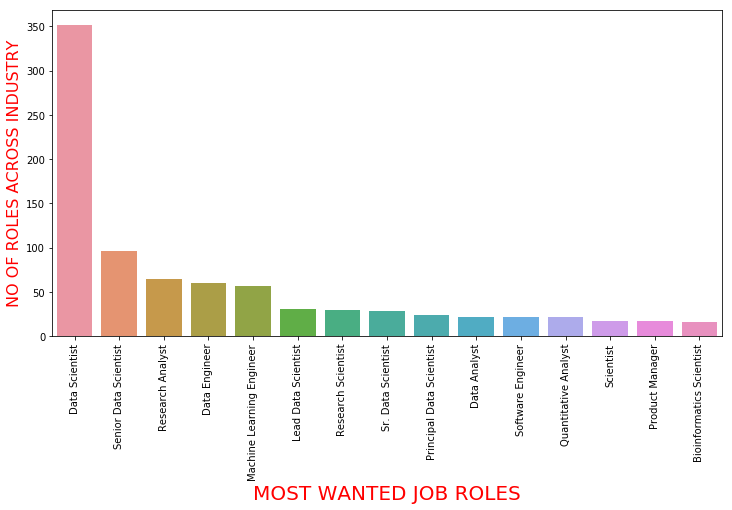

In [31]:
# Plot graph for top most offered roles
fig,ax=plt.subplots(figsize=(12,6))
ax=seaborn.barplot(x="position", y="company", data=most_offd_roles)    
ax.set_xticklabels(most_offd_roles['position'],rotation=90)
ax.set_xlabel('MOST WANTED JOB ROLES',fontsize=20,color='red')
ax.set_ylabel('NO OF ROLES ACROSS INDUSTRY',fontsize=16,color='red')

In [11]:
#MACHINE LEARNING
#there are so many job profiles in teh given dataset so lets Categories them into 5; 
#Data Scientist, Machine Learning Engineer, Data Analyst, 
#Data Science Manager and Others

# Creating only 5 datascience roles among all
data=datasci_df.copy()
data.dropna(subset=['position'], how='all', inplace = True)
data['position']=[x.upper() for x in data['position']]
data['description']=[x.upper() for x in data['description']]

data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'
data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'
data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
data.position=['Others' if x is np.nan else x for x in data.position]

position=data.groupby(['position'])['company'].count()   
position=position.reset_index(name='company')
position=position.sort_values(['company'],ascending=False)

print('Here is  the count of each new roles we created :', '\n\n', position)


Here is  the count of each new roles we created : 

                     position  company
2             Data Scientist     2645
3  Machine Learning Engineer     1384
4                     Others     1295
0               Data Analyst      848
1       Data Science Manager      781


In [12]:
# Data Cleansing
X=data.description
Y=data.position

X=[re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in X]
X=[re.sub("[0-9]+",' ',k) for k in X]

#applying stemmer
ps =PorterStemmer()
X=[ps.stem(k) for k in X]

#Note: I have not removed stop words because there are important key words mentioned in job description which are of length 2, I feel they have weightage while classifing
tfidf=TfidfVectorizer()
label_enc=LabelEncoder()

X=tfidf.fit_transform(X)
Y=label_enc.fit_transform(Y)

In [32]:
#Save DataFrame into CSV
cleandata_file="../resources/data-scientist-job-market-in-the-us/cleandata.csv"
data.to_csv(cleandata_file)